In [1]:
from cvxpy import *
import numpy as np
import scipy.spatial.distance as sdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sk
from sklearn import decomposition
import time
import warnings
warnings.filterwarnings('ignore')

In [129]:
X = np.fromfile("bb_ly_sincos.dat")
X = np.reshape(X, [10010, 512])

Xassign = []
for i in range(10):
    for j in range(100):
        Xassign.append(i)
Xassign = np.asarray(Xassign)

Xassign_100 = []
for i in range(10):
    for j in range(10):
        Xassign_100.append(i)
Xassign_100 = np.asarray(Xassign_100)


Xassign_10 = []
for i in range(10):
    Xassign_10.append(i)
Xassign_10 = np.asarray(Xassign_10)


Xassign_1000 = []
for i in range(10):
    for j in range(1000):
        Xassign_1000.append(i)
Xassign_1000 = np.asarray(Xassign_1000)
Xassign_1000.shape

Xassign_1010 = []
for i in range(10):
    for j in range(1001):
        Xassign_1010.append(i)
Xassign_1010 = np.asarray(Xassign_1010)
Xassign.shape

(1000,)

In [32]:
X0 = np.array(X[0:1000])
X1 = np.array(X[1000:2000])
X2 = np.array(X[2000:3000])
X3 = np.array(X[3000:4000])
X4 = np.array(X[4000:5000])
X5 = np.array(X[5000:6000])
X6 = np.array(X[6000:7000])
X7 = np.array(X[7000:8000])
X8 = np.array(X[8000:9000])
X9 = np.array(X[9000:10000])

In [33]:
X_sims = [X + i for i in range(10)]
X_sims = np.asarray(X_sims)
X_sims.shape

(10, 10010, 512)

In [168]:
X0_set = np.array(np.vsplit(X0, 100))
X1_set = np.array(np.vsplit(X1, 100))
X2_set = np.array(np.vsplit(X2, 100))
X3_set = np.array(np.vsplit(X3, 100))
X4_set = np.array(np.vsplit(X4, 100))
X5_set = np.array(np.vsplit(X5, 100))
X6_set = np.array(np.vsplit(X6, 100))
X7_set = np.array(np.vsplit(X7, 100))
X8_set = np.array(np.vsplit(X8, 100))
X9_set = np.array(np.vsplit(X9, 100))

print(X0.shape)

X0_mixed = np.zeros(X0_set.shape)
X1_mixed = np.zeros(X0_set.shape)
X2_mixed = np.zeros(X0_set.shape)
X3_mixed = np.zeros(X0_set.shape)
X4_mixed = np.zeros(X0_set.shape)
X5_mixed = np.zeros(X0_set.shape)
X6_mixed = np.zeros(X0_set.shape)
X7_mixed = np.zeros(X0_set.shape)
X8_mixed = np.zeros(X0_set.shape)
X9_mixed = np.zeros(X0_set.shape)


X_all_orig = np.array([X0_set,X1_set,X2_set,X3_set,X4_set,
                 X5_set,X6_set,X7_set,X8_set,X9_set])
j = 0
for i in range(10):
    X0_mixed[j:j+10] = X_all_orig[i][0:10]
    j+=10
    
j = 0
for i in range(10):
    X1_mixed[j:j+10] = X_all_orig[i][10:20]
    j+=10
    
j = 0
for i in range(10):
    X2_mixed[j:j+10] = X_all_orig[i][20:30]
    j+=10
    
j = 0
for i in range(10):
    X3_mixed[j:j+10] = X_all_orig[i][30:40]
    j+=10
    
j = 0
for i in range(10):
    X4_mixed[j:j+10] = X_all_orig[i][40:50]
    j+=10
    
j = 0
for i in range(10):
    X5_mixed[j:j+10] = X_all_orig[i][50:60]
    j+=10
    
j = 0
for i in range(10):
    X6_mixed[j:j+10] = X_all_orig[i][60:70]
    j+=10
    
j = 0
for i in range(10):
    X7_mixed[j:j+10] = X_all_orig[i][70:80]
    j+=10
    
j = 0
for i in range(10):
    X8_mixed[j:j+10] = X_all_orig[i][80:90]
    j+=10
    
j = 0
for i in range(10):
    X9_mixed[j:j+10] = X_all_orig[i][90:100]
    j+=10
    

X_all_mixed = np.array([X0_mixed,X1_mixed,X2_mixed,X3_mixed,X4_mixed,
                      X5_mixed,X6_mixed,X7_mixed,X8_mixed,X9_mixed])

# for i in range(10):
#     X_all_mixed[i] = np.vstack(X_all_mixed[i])
    
# X0_mixed.shape
# X0_set = np.array(np.vstack(X0_set))
X0_mixed = np.vstack(X0_mixed)
X1_mixed = np.vstack(X1_mixed)
X2_mixed = np.vstack(X2_mixed)
X3_mixed = np.vstack(X3_mixed)
X4_mixed = np.vstack(X4_mixed)
X5_mixed = np.vstack(X5_mixed)
X6_mixed = np.vstack(X6_mixed)
X7_mixed = np.vstack(X7_mixed)
X8_mixed = np.vstack(X8_mixed)
X9_mixed = np.vstack(X9_mixed)


X_all_mixed = np.array([X0_mixed,X1_mixed,X2_mixed,X3_mixed,X4_mixed,
                      X5_mixed,X6_mixed,X7_mixed,X8_mixed,X9_mixed])

(1000, 512)


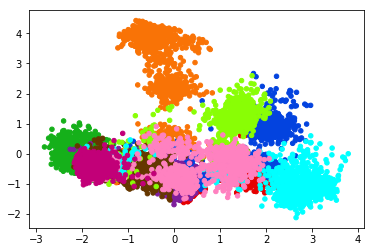

In [34]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
Xij_pca = pca.fit_transform(X)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(Xij_pca[:, 0], Xij_pca[:, 1],
           color=[color[i] for i in Xassign_1010.astype(int)],
           s=20)
plt.title('Non-clustered lysozyme trajectories (10 sims)')
plt.show()

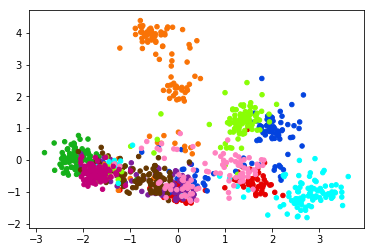

In [35]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
Xij_pca = pca.fit_transform(X)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(Xij_pca[range(0,10010,10), 0], Xij_pca[range(0,10010,10), 1],
           color=[color[i] for i in Xassign_1010[range(0,10010,10)].astype(int)],
           s=20)
plt.show()

In [36]:
# Kmeans
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign_1010,labels)))

NMI: 0.6034507983280566


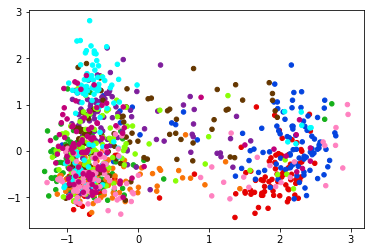

In [142]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X0_pca = pca.fit_transform(X0_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X0_pca[:, 0], X0_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.42152272879410574


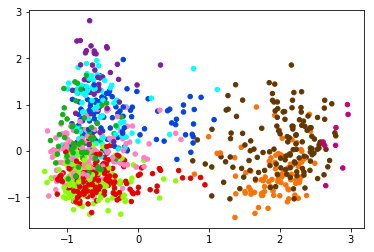

In [143]:
# Kmeans
kmeans = KMeans(n_clusters=10).fit(X0_mixed)
labels = kmeans.predict(X0_mixed)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X0_pca[:, 0], X0_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

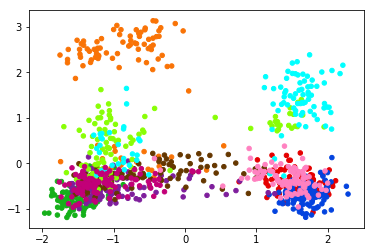

In [145]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X1_pca = pca.fit_transform(X1_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X1_pca[:, 0], X1_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.7046851089464119


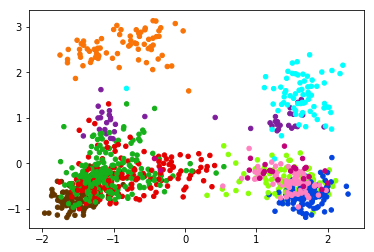

In [146]:
# Kmeans
X=X1_mixed
X_pca=X1_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

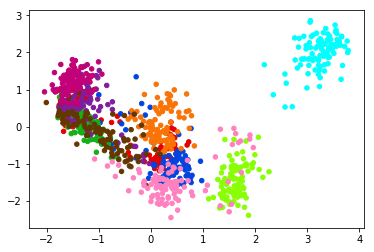

In [147]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X2_pca = pca.fit_transform(X2_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X2_pca[:, 0], X2_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.75685208210682


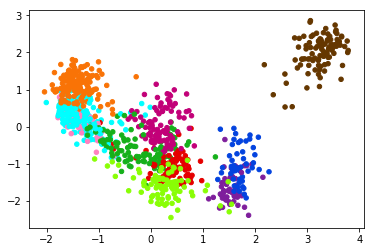

In [148]:
# Kmeans
X=X2_mixed
X_pca=X2_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

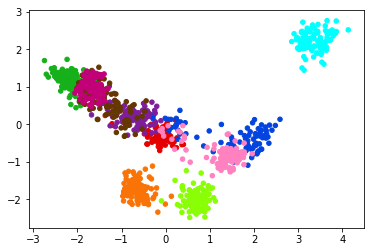

In [149]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X3_pca = pca.fit_transform(X3_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X3_pca[:, 0], X3_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.9320265756162702


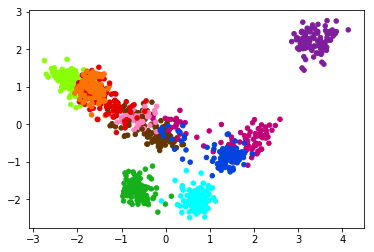

In [151]:
# Kmeans
X=X3_mixed
X_pca=X3_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

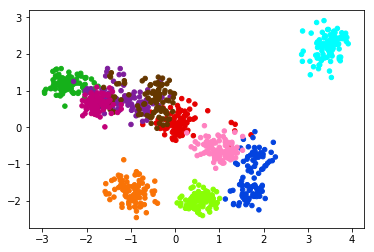

In [152]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X4_pca = pca.fit_transform(X4_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X4_pca[:, 0], X4_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.9864683112941708


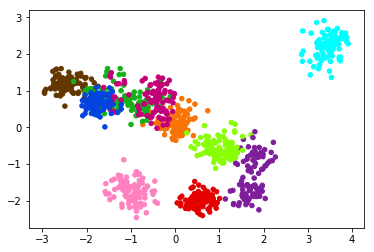

In [153]:
# Kmeans
X=X4_mixed
X_pca=X4_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

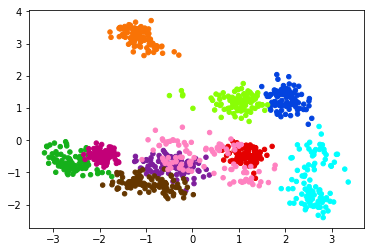

In [154]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X5_pca = pca.fit_transform(X5_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X5_pca[:, 0], X5_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.9975657074728201


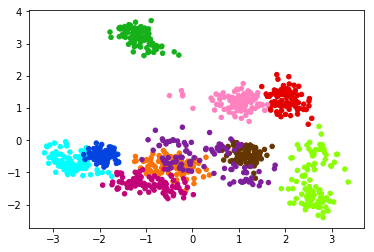

In [155]:
# Kmeans
X=X5_mixed
X_pca=X5_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

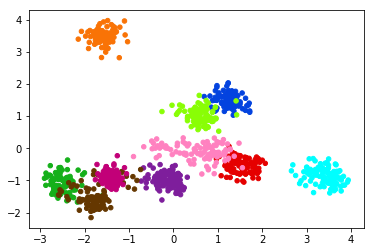

In [156]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X6_pca = pca.fit_transform(X6_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X6_pca[:, 0], X6_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 1.0


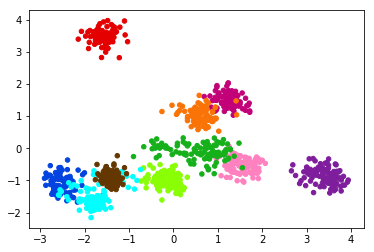

In [157]:
# Kmeans
X=X6_mixed
X_pca=X6_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

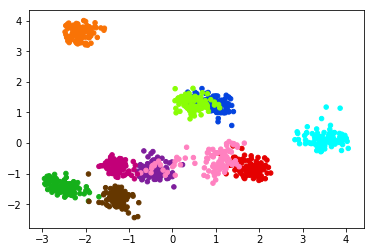

In [158]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X7_pca = pca.fit_transform(X7_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X7_pca[:, 0], X7_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 1.0


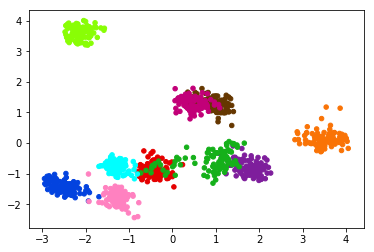

In [159]:
# Kmeans
X=X7_mixed
X_pca=X7_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

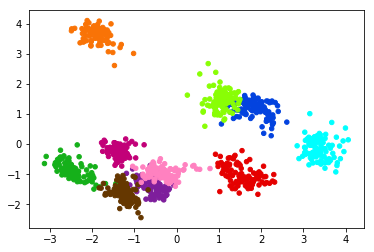

In [160]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X8_pca = pca.fit_transform(X8_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X8_pca[:, 0], X8_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.9975657074728201


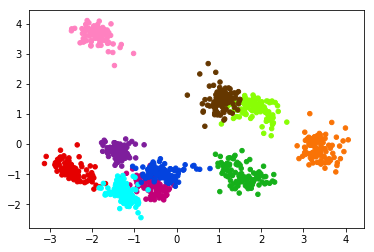

In [161]:
# Kmeans
X=X8_mixed
X_pca=X8_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

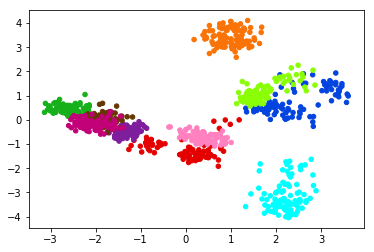

In [162]:
# Ground truth for X1 set
pca = decomposition.PCA(n_components=2)
X9_pca = pca.fit_transform(X9_mixed)
color = ['xkcd:red','xkcd:blue','xkcd:green','xkcd:orange','xkcd:purple','xkcd:brown','xkcd:lime green','xkcd:cyan','xkcd:pink','xkcd:magenta']
plt.scatter(X9_pca[:, 0], X9_pca[:, 1],
           color=[color[i] for i in Xassign.astype(int)],
           s=20)
plt.show()

NMI: 0.9543053826646107


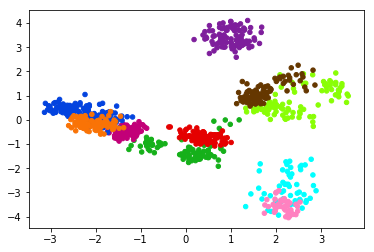

In [163]:
# Kmeans
X=X9_mixed
X_pca=X9_pca
kmeans = KMeans(n_clusters=10).fit(X)
labels = kmeans.predict(X)
print("NMI: " + str(sk.normalized_mutual_info_score(Xassign,labels)))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
           color=[color[i] for i in labels.astype(int)],
           s=20)
plt.show()

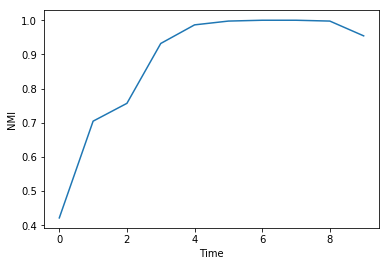

In [166]:
kmeans_plot = np.array([0.42152272879410574, 0.7046851089464119, 0.75685208210682, 0.9320265756162702, 0.9864683112941708, 0.9975657074728201, 1.0, 1.0, 0.9975657074728201, 0.9543053826646107])
plt.ylabel('NMI')
plt.xlabel('Time')
plt.plot(kmeans_plot)
plt.show()